<a href="https://colab.research.google.com/github/aageo25/aageo25/blob/main/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Pytorch operations

In [32]:
import torch

# tensors are extensions of numpy arrays
x = torch.tensor([[1,2,3],[4,5,6]])
y = torch.tensor([[7,8,9],[10,11,12]])

f = 2*x + y
print(f)

tensor([[ 9, 12, 15],
        [18, 21, 24]])


## Default value initialization

In [4]:
shape = [2,3]

xzeros = torch.zeros(shape) # default tensor with zeros values
xones = torch.ones(shape) # default tensor with one values
xrnd = torch.rand(shape) # default tensor with random values

print(xzeros)
print(xones)
print(xrnd)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.2447, 0.7728, 0.2113],
        [0.5941, 0.4254, 0.2938]])


## Seed of reproducibility

by setting a manual seed, one can ensure reproducibility when training a model. The seeding number is meaningless. I tan be any number, as long as it is consistently.

In [25]:
# no manual seed
print(torch.rand(shape))

tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])


In [29]:
# bu setting maunal seed, the tensor values stay the same
torch.manual_seed(42)

print(torch.rand(shape))

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])


## Converting between tensors and NumPy arrays

In [33]:
import numpy as np

xnp = np.array([[1,2,3], [4,5,6]])
f2 = xnp + y
print(f2)
f2.type()

TypeError: ignored

In [34]:
# tensor from a numpy array
xtensor = torch.from_numpy(xnp)
print(xtensor)
print(xtensor.type())

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.LongTensor


In [35]:
# convert from a tensor to numpy

print(f.type())
fnp = f.numpy()
type(fnp) #numpy arrays do not have a type attribute, as tensosr have

torch.LongTensor


numpy.ndarray

In [36]:
# tensors and numpy arrays share the same memory space
a = np.ones(3)
t = torch.from_numpy(a) # create a tensor from array
b = t.numpy() # create an array from the tensor
b[1] = 0 # change a value in the original array
print(a[1] == b[1])
print(t) # changes propagate to the tensor - they share the same memory

True
tensor([1., 0., 1.], dtype=torch.float64)


In [40]:
# only certain dtypes arreys can be torned into tensors
int8np = np.ones((3,4),dtype=np.int8)
bad = torch.from_numpy(int8np)
bad.type() # it seems that it accepts int8 now

'torch.CharTensor'

In [42]:
# one can define a particular data type
xint = torch.ones((2,3), dtype=torch.int)
xint.type()

'torch.IntTensor'

## Slicing and indexing and reshaping

In [44]:
print(x[0])
print(x[1][0:2])

tensor([1, 2, 3])
tensor([4, 5])


In [45]:
# reshape is possible through the view() function
print(x.view(-1)) # useful when we don't know how may columns is required
print(x.view(3,2))
print(x.view(6,1))

tensor([1, 2, 3, 4, 5, 6])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])


In [47]:
# tranpose: convert rows into columns
print(x)
print(x.transpose(0,1)) # pytorch can only swap two axes at once

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [50]:
# permute() allows to swap multiple axes
a = torch.ones(1,2,3,4)
print(a.size())
print(a.transpose(0,3).transpose(1,2).size()) # swap axis in two steps
print(a.permute(3,2,1,0).size()) # swap all axis at once

torch.Size([1, 2, 3, 4])
torch.Size([4, 3, 2, 1])
torch.Size([4, 3, 2, 1])


## In place operations

In [51]:
print(x)
x.transpose_(1,0) # equivalent to x = x.transpose()
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


In [53]:
x = torch.tensor([[1,2,3],[4,5,6]])

print(y)
y.add_(x*2)
print(y)

tensor([[ 7,  8,  9],
        [10, 11, 12]])
tensor([[ 9, 12, 15],
        [18, 21, 24]])


# Loading data

## PyTorch dataset loaders

In [55]:
import torch
import torchvision
import torchvision.transforms as transforms

trainset = torchvision.datasets.CIFAR10(
    root='./data', # data root directory
    download=True,
    transform = transforms.ToTensor()
)

trainset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [61]:
# check the dataset content
for i in range(len(trainset)):
  print('size of image {} label {}'.format(trainset[i][0].size(),trainset[i][1]))
  if i>2: break

size of image torch.Size([3, 32, 32]) label 6
size of image torch.Size([3, 32, 32]) label 9
size of image torch.Size([3, 32, 32]) label 9
size of image torch.Size([3, 32, 32]) label 4


## Displaying an image

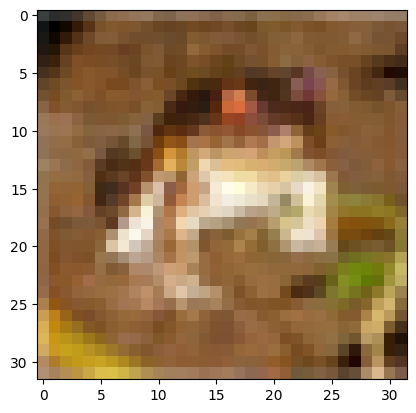

In [64]:
import matplotlib.pyplot as plt

torchimage = trainset[0][0]
npimage = torchimage.permute(1,2,0) # changes the axis order ['color', 'height', 'width] to ['height', 'width', color]
plt.imshow(npimage) # plots the image - no need to covnert to numpy

## DataLoader

In [69]:
# iterator to sample the data in a specified way

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
dataiter = iter(trainloader) # create an interator from a dataloader object
images, labels = next(dataiter) # builds tensors from images and labels in the batch
print(images.size()) # prints the size of the batch

torch.Size([4, 3, 32, 32])


In [68]:
trainloader.generator

## Creating a custom dataset

In [90]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torch
import csv
import os

class ToyDataset(Dataset):
  def __init__(self, datapath, labelsfile, transform=None):
    self.datapath = datapath # the path to the data directory
    self.transform = transform # a transform object

    # builds a list of (name,Label) tuples
    with open(os.path.join(self.datapath,labelsfile)) as f:
      self.labels = [tuple(line) for line in csv.reader(f)]
    # checks that all image files exist
    #for i in range(len(self.labels)):
    #  assert os.path.isfile(datapath + '/' + self.labels[i][0])

  # so we ca use dataset.len()
  def __len__(self):
    return len(self.labels)

  # so we can use indexing
  def __getitem__(self, idx):
    imagename, imagelabel = self.labels[idx][0:]
    imagepath = os.path.join(self.datapath,imagename)
    image = Image.open(open(imagepath, 'rb'))

    # transform the image if required
    if self.transform:
      image = self.transform(image)
      return((image,imagelabel))

In [95]:
# creating an instance of our custom dataset
from google.colab import drive
drive.mount("/content/gdrive")

toydata = ToyDataset(
    datapath='/content/gdrive/MyDrive/datasets/GiuseppeToys',
    labelsfile='labels.csv',
    transform = transforms.ToTensor()
)
print(toydata[0][0].size()) # the size of the first image in the dataset
print(toydata[0][1]) # the label

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FileNotFoundError: ignored

## Transforms

More at https://pytorch.org/vision/stable/transforms.html

In [97]:
tforms = transforms.Compose([
    transforms.Grayscale(3), transforms.CenterCrop(300), transforms.ToTensor()
])

In [98]:
tforms = torch.nn.Sequential(
    transforms.CenterCrop(10),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
)
scripted_transforms = torch.jit.script(tforms)